#### importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.stats import shapiro,levene
from sklearn.model_selection import train_test_split

#### importing the dataset

In [5]:
data=pd.read_csv("../input/USA_Housing.csv")
data.head()
# drop the Address column
data = data.drop('Address', axis=1)
#checking the head of the data
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
#describing the data
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [8]:
#checking the shape of the data
data.shape

(5000, 6)

#### checking for null values in the given dataset

In [9]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

#### hence there are no null values in the dataset EDA is not required

#### plotting a heatmap to check the correlation between the variables 

In [10]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


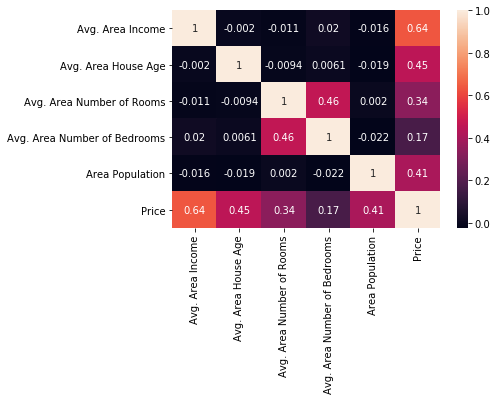

In [11]:
sns.heatmap(data.corr(),annot=True)

#### Pairplot to check the normalization and linearization of the  given dataset

In [ ]:
sns.pairplot(data,diag_kind='kde')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


#### normalizing the data as there are different measuring units in the given dataset

In [ ]:
data.columns

In [ ]:
# renaming the columns
data.rename(columns={'Avg. Area Income':'Area_Income','Avg. Area House Age':'Area_House_Age','Avg. Area Number of Rooms':'Area_Number_of_Rooms','Avg. Area Number of Bedrooms':'Area_Number_of_Bedrooms','Area Population':'Area_Population'},inplace=True)

In [ ]:
data.columns

In [ ]:
X = data[data.columns[0:-1]]
Y = data["Price"]
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)

#### Fitting the model by using OLS method 
#### backward elimination

In [ ]:
model=smf.ols('Price~Area_Income+Area_House_Age+Area_Number_of_Rooms+Area_Number_of_Bedrooms+Area_Population',data).fit()
model.summary()

#### as the p value is higher for Area_Number_of_Bedrooms column dropping off the Area_Number_of_Bedrooms column

In [ ]:
#refitting  the model
model=smf.ols('Price~Area_Income+Area_House_Age+Area_Number_of_Rooms+Area_Population',data).fit()
model.summary()

#### performing train_test_split and linear regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=data.drop(['Area_Number_of_Bedrooms','Price'],axis=1)
Y=data['Price']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

In [ ]:
ypred=linreg.predict(X_test)
ypred

#### K-FOLD VALIDATION

In [ ]:
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,auc

In [ ]:
X.head()

In [ ]:
Y.head()

#### computing RMSE and R-squared values

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
root=[]
lst=[]
for train,test in kf.split(X,Y):
    linreg=LinearRegression()
    X_train,X_test=X.iloc[train,:],X.iloc[test,:]
    Y_train,Y_test=Y.iloc[train],Y.iloc[test]
    linreg.fit(X_train,Y_train)
    ypred=linreg.predict(X_test)
    root.append(np.sqrt(metrics.mean_squared_error(Y_test,ypred)))
    lst.append(linreg.score(X_train,Y_train))
    
print('Cross Validation Mean rmse is %1.2f'%np.mean(root))
print('Cross Validation Variance of rmse is %1.5f'%np.var(root,ddof=1))
print('Cross Validation Mean R square is %1.2f'%np.mean(lst))
print('Cross Validation Variance of R square is %1.5f'%np.var(lst,ddof=1))

#### insights